## Tobigs 10주차 Recommendation 과제
#### 15기 이윤정
---

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_columns', 100)

In [2]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [9]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

genres_list = []  #장르 리스트
movies_df = movies.copy()  #movies 데이터프레임 복사

#iterrows() : 첫번째 변수는 인덱스를 받고, 두번째 변수는 열의 행에 하나씩 접근
for index, row in movies.iterrows():
    try:
        genres = row.genres.split('|')
        genres_list.extend(genres) #'|' 존재 = 장르가 여러개라는 의미이므로 extend() 명령어를 통해 한번에 리스트에 추가
    except:
        genres_list.append(row.genres)
        
genres_list = list(set(genres_list))


for genre in genres_list: #장르를 이름으로 갖는 column 생성
    movies_df[genre] = 0  #0으로 초기화

    
for index, row in movies_df.iterrows():    
    try:
        genres = row.genres.split('|') #다중 장르인 경우
    except Exception:
        genres = list(row.genres)  #단일 장르인 경우
    
    for genre in genres:
        movies_df.loc[index, genre] = 1

In [10]:
movies_df.drop(['title', 'genres'], axis=1, inplace=True)
movies_df = movies_df.set_index('movieId')
movies_df

,Documentary,Fantasy,Mystery,Action,Musical,Romance,Animation,Film-Noir,Crime,Sci-Fi,War,Horror,Drama,Adventure,(no genres listed),Children,Western,Comedy,Thriller,IMAX
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
193583,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
193585,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


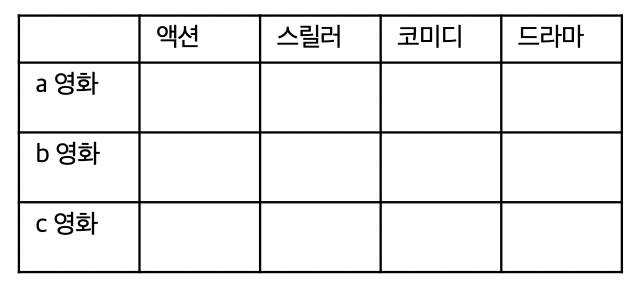

In [11]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
# piv = movies_df.replace(0, np.nan)
piv = movies_df.copy()
piv

,Documentary,Fantasy,Mystery,Action,Musical,Romance,Animation,Film-Noir,Crime,Sci-Fi,War,Horror,Drama,Adventure,(no genres listed),Children,Western,Comedy,Thriller,IMAX
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
193583,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
193585,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
movies['corpus'] = movies['genres'].apply(lambda x : ' '.join(x.split('|')))

In [15]:
tfidv = TfidfVectorizer().fit(movies['corpus'])

In [16]:
temp = pd.DataFrame(tfidv.transform(movies['corpus']).toarray())

In [17]:
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [18]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = cosine_similarity(piv)

In [20]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF_df = pd.DataFrame(CBF, index = piv.index, columns = piv.index)
CBF_df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,0.258199,0.316228,0.774597,0.00000,0.258199,0.000000,0.000000,0.447214,0.447214,0.200000,0.258199,0.000000,0.000000,0.000000,0.000000,0.00000,0.316228,0.000000,0.400000,0.000000,0.00000,0.0,0.316228,0.000000,0.632456,0.316228,0.00000,0.000000,0.000000,0.00000,0.516398,0.258199,0.000000,0.0,0.400000,0.000000,0.0,0.258199,0.316228,0.632456,...,0.516398,0.516398,0.000000,0.447214,0.000000,0.670820,0.316228,0.000000,0.316228,0.258199,0.0,0.316228,0.447214,0.258199,0.258199,0.200000,0.670820,0.258199,0.447214,0.0,0.516398,0.600000,0.000000,0.316228,0.447214,0.774597,0.316228,0.0,0.258199,0.000000,0.000000,0.258199,0.0,0.000000,0.447214,0.00000,0.00000,0.447214,0.0,0.447214,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,0.000000,0.000000,0.666667,0.00000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.408248,0.000000,0.516398,0.000000,0.00000,0.0,0.408248,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00000,0.666667,0.000000,0.000000,0.0,0.258199,0.000000,0.0,0.000000,0.408248,0.408248,...,0.666667,0.666667,0.000000,0.000000,0.000000,0.866025,0.000000,0.000000,0.408248,0.333333,0.0,0.000000,0.000000,0.333333,0.333333,0.258199,0.577350,0.000000,0.577350,0.0,0.333333,0.516398,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.288675,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,0.816497,0.500000,0.000000,0.00000,0.408248,0.000000,0.500000,0.707107,0.707107,0.316228,0.408248,0.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.500000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.408248,0.500000,0.0,0.316228,0.500000,0.0,0.816497,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.500000,0.707107,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.0,0.408248,0.316228,0.000000,1.000000,0.707107,0.408248,0.500000,0.0,0.000000,0.000000,0.000000,0.408248,0.0,0.500000,0.707107,0.00000,0.00000,0.000000,0.0,0.353553,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,1.000000,0.408248,0.000000,0.57735,0.333333,0.408248,0.816497,0.577350,0.577350,0.516398,0.333333,0.258199,0.000000,0.408248,0.816497,0.57735,0.408248,0.816497,0.258199,0.408248,0.57735,0.0,0.408248,0.408248,0.408248,0.816497,0.57735,0.408248,0.333333,0.57735,0.000000,0.666667,0.816497,0.0,0.516398,0.816497,0.0,1.000000,0.408248,0.408248,...,0.000000,0.000000,0.408248,0.577350,0.288675,0.000000,0.816497,0.333333,0.000000,0.333333,0.0,0.408248,0.577350,0.000000,0.000000,0.258199,0.000000,0.333333,0.000000,0.0,0.333333,0.258199,0.408248,0.816497,0.577350,0.333333,0.816497,0.0,0.000000,0.000000,0.000000,0.666667,0.0,0.816497,0.577350,0.57735,0.57735,0.000000,0.0,0.288675,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.

In [21]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(Id):
    target = movies[movies['movieId']==Id]
    
    df = pd.DataFrame(CBF_df.loc[Id].sort_values(ascending=False)[:11]) #코사인 유사도 행렬에서 상위 11개 추출
    df.reset_index(inplace=True)
    df = df[df['movieId']!=Id]  #자기 자신 제외
    df_idx = list(df['movieId'])  #리스트화

    #isin 함수 사용 시 인덱스의 오름차 순으로 데이터 프레임이 생성되어 따로 concat 진행
    res = movies[movies['movieId'] == df_idx[0]]
    for i in range(1, len(df_idx)):
        tmp = movies[movies['movieId'] == df_idx[i]]
        res = pd.concat([res, tmp])

    #input 데이터 정보 출력
    title = target['title'].values
    genres = target['genres'].values
    print("입력 영화 : ",title)
    print("입력 영화 장르 : ",genres)
    
    print("=====Most similar List=====")
    
    return res

In [22]:
getCBF(193583)

입력 영화 :  ['No Game No Life: Zero (2017)']
입력 영화 장르 :  ['Animation|Comedy|Fantasy']
=====Most similar List=====


,movieId,title,genres,corpus
7368,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
3098,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4558,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
4841,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
8999,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy
6859,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,Animation Comedy Fantasy Sci-Fi
7184,72356,Partly Cloudy (2009),Animation|Children|Comedy|Fantasy,Animation Children Comedy Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [23]:
# User-Item 간 선호도 데이터프레임 만들기

ratings_df = ratings.drop('timestamp', axis=1)
ratings_df = ratings_df.pivot_table('rating', index='userId', columns='movieId').fillna(0)
ratings_df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5

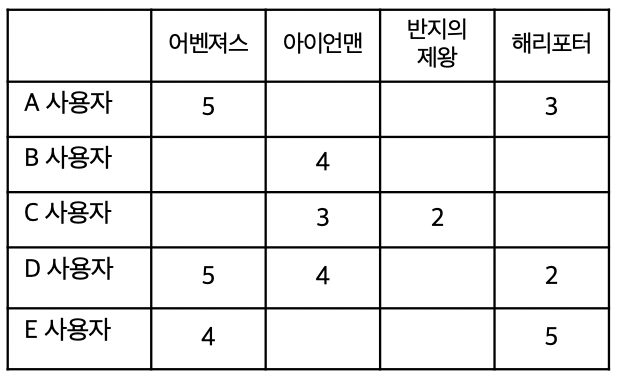

In [32]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = ratings_df.copy()
piv

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5

In [25]:
# 사용자 간 유사도 구하기
CF = cosine_similarity(piv)

In [26]:
# movie - moive 아이템 간 유사도 데이터프레임
CF_df = pd.DataFrame(CF, index = piv.index, columns = piv.index)
CF_df

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,0.109053,0.255660,0.122498,0.110829,0.327922,0.109975,0.063193,0.098072,0.100929,0.106080,...,0.315254,0.180987,0.031825,0.034747,0.128877,0.144707,0.050741,0.099100,0.105033,0.282525,0.090224,0.131072,0.253480,0.093450,0.062668,0.051803,0.317319,0.000000,0.141129,0.249326,0.057399,0.048914,0.052175,0.100406,0.114076,0.123280,0.122782,0.183922,0.118112,0.324766,0.136809,0.143934,0.174413,0.141960,0.110558,0.123713,0.312843,0.011280,0.282412,0.291272,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,0.044419,0.000000,0.043918,0.016901,0.119778,0.093728,0.103755,0.166253,0.012571,0.014137,0.090880,0.144635,0.013597,0.129902,0.226008,0.000000,0.000000,0.058145,0.104059,0.149324,0.000000,0.017807,0.032428,0.043299,0.000000,0.054012,0.028500,0.023147,0.000000,0.017446,0.128237,0.039293,0.011261,0.000000,0.033790,0.020886,0.067801,0.000000,0.102534,0.115801,...,0.146946,0.085939,0.016849,0.077739,0.027396,0.021830,0.091056,0.000000,0.000000,0.055382,0.000000,0.032675,0.167959,0.035531,0.000000,0.000000,0.014870,0.000000,0.000000,0.061953,0.136703,0.219315,0.043620,0.000000,0.127551,0.089562,0.000000,0.055900,0.026429,0.056348,0.036147,0.030684,0.062033,0.013125,0.000000,0.104568,0.011986,0.048508,0.098000,0.023248,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064,0.017251,0.032299,0.009813,0.028241,0.019142,0.008756,0.004017,0.003070,0.003081,0.002592,0.005100,0.000000,0.002332,0.029771,0.005974,0.000000,0.003507,0.015494,0.007156,0.000736,0.000000,0.000000,0.000000,0.004196,0.003639,0.002530,0.001975,0.011568,0.000000,0.030638,0.021675,0.000000,0.002646,0.000000,0.005768,0.006371,...,0.063225,0.047333,0.002036,0.000000,0.006208,0.003957,0.000000,0.000000,0.000000,0.002347,0.020899,0.008056,0.000000,0.000000,0.000000,0.029830,0.039894,0.000000,0.005749,0.033121,0.008561,0.000000,0.000000,0.000000,0.000000,0.000986,0.015793,0.003923,0.004791,0.027418,0.000000,0.000000,0.006460,0.001983,0.000000,0.025873,0.028970,0.000000,0.039539,0.013143,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,0.054767,0.049945,0.076949,0.048989,0.071551,0.164761,0.145058,0.123217,0.206053,0.113755,0.053014,0.043403,0.093971,0.071690,0.032862,0.061832,0.128954,0.135593,0.061308,0.058140,0.126182,0.200597,0.167247,0.045571,0.050148,0.113807,0.061031,0.090125,0.240976,0.053436,0.129022,0.148847,0.056265,0.038021,0.200832,0.063022,0.049246,0.024882,0.004130,0.084035,...,0.156591,0.100382,0.072709,0.025386,0.073778,0.099163,0.041899,0.076795,0.032616,0.181280,0.018553,0.182857,0.125627,0.064559,0.061035,0.005932,0.169440,0.000000,0.098777,0.148584,0.043871,0.047619,0.048474,0.041246,0.088289,0.064095,0.138766,0.049146,0.064485,0.219298,0.116111,0.068196,0.217116,0.082614,0.091974,0.107908,0.275436,0.016054,0.201610,0.211921,0.0859

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(Id):
    target = ratings[ratings['userId']==Id]
    already = list(ratings[ratings['userId']==Id]['movieId'].values)  #기존에 본 영화
    almovie = movies_df.loc[already] #기존에 본 영화만 추출
    almovie_rating =pd.DataFrame()  #빈 데이터프레임
    for genre in genres_list: #장르를 이름으로 갖는 column 생성
        almovie_rating[genre] = 0  #0으로 초기화

    for i in genres_list: #장르 합
        almovie_rating.loc[0,i] = almovie[i].sum()
    
    almovie_rating = almovie_rating[almovie_rating>0] #하나도 안본 장르는 결측치 처리
    almovie_rating.dropna(axis=1, inplace=True)  #제거
    almovie_rating = almovie_rating.T
    
    plt.figure(figsize=(12,8))
    plt.plot(almovie_rating)
    plt.xticks(rotation=90)
    
    df = pd.DataFrame(CF_df.loc[Id].sort_values(ascending=False)[:2]) #코사인 유사도 행렬에서 상위 2개 추출
    df.reset_index(inplace=True)
    df = df[df['userId']!=Id]  #자기 자신 제외
    df_idx = list(df['userId'])  #리스트화 - 나와 유사한 취향을 가진 유저 상위 2명
    
    recommend=[]  #최종 추천 영화리스트
    
    pivv = piv.copy()
    pivv = pivv[pivv.columns.difference(already)]  #입력 사용자가 시청한 영화는 제외한 dataset
    
    for i in df_idx:
        recommend.append(pivv.iloc[i].sort_values(ascending=False)[:5].index)  #상위 5개    
        
    res = movies[movies['movieId'] == recommend[0][0]]  #리스트 속 리스트
    for i in range(1, len(recommend[0])):
        tmp = movies[movies['movieId'] == recommend[0][i]]
        res = pd.concat([res, tmp])
        
    return res

,movieId,title,genres,corpus
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama
1261,1676,Starship Troopers (1997),Action|Sci-Fi,Action Sci-Fi
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,Action Sci-Fi
6220,45720,"Devil Wears Prada, The (2006)",Comedy|Drama,Comedy Drama
4796,7147,Big Fish (2003),Drama|Fantasy|Romance,Drama Fantasy Romance


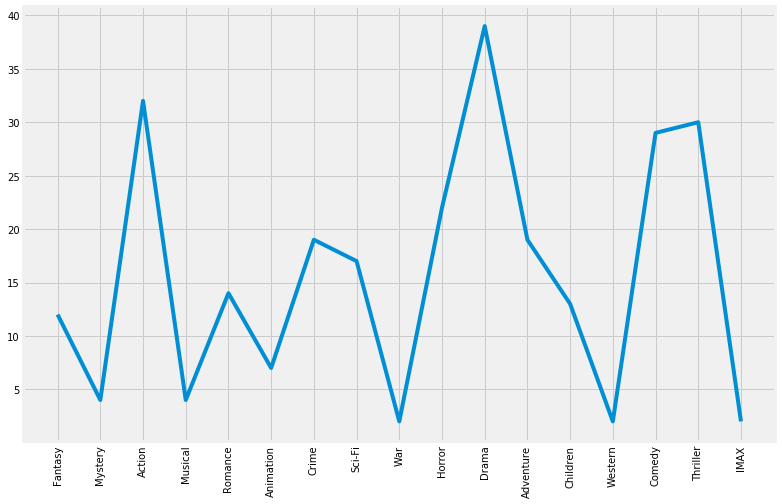

In [28]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [29]:
import MF

In [33]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(piv.values, k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0026
Iteration: 20 ; cost = 0.0026
Iteration: 30 ; cost = 0.0025
Iteration: 40 ; cost = 0.0025
Iteration: 50 ; cost = 0.0024
Iteration: 60 ; cost = 0.0024
Iteration: 70 ; cost = 0.0024
Iteration: 80 ; cost = 0.0024
Iteration: 90 ; cost = 0.0023
Iteration: 100 ; cost = 0.0023
Iteration: 110 ; cost = 0.0023
Iteration: 120 ; cost = 0.0023
Iteration: 130 ; cost = 0.0023
Iteration: 140 ; cost = 0.0023
Iteration: 150 ; cost = 0.0022
Iteration: 160 ; cost = 0.0022
Iteration: 170 ; cost = 0.0022
Iteration: 180 ; cost = 0.0022
Iteration: 190 ; cost = 0.0022
Iteration: 200 ; cost = 0.0022
Iteration: 210 ; cost = 0.0022
Iteration: 220 ; cost = 0.0022
Iteration: 230 ; cost = 0.0022
Iteration: 240 ; cost = 0.0022
Iteration: 250 ; cost = 0.0022
Iteration: 260 ; cost = 0.0022
Iteration: 270 ; cost = 0.0022
Iteration: 280 ; cost = 0.0021
Iteration: 290 ; cost = 0.0021
Iteration: 300 ; cost = 0.0021
User Latent P:
[[ 0.0703946  -0.09252545  0.00429431]
 [ 0.060812    0.05714198

In [35]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9674,9675,9676,9677,9678,9679,9680,9681,9682,9683,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.776744,4.280167,4.024504,3.084768,3.662984,4.811337,3.993585,3.556213,3.536652,4.335014,4.323462,3.568665,3.888047,4.393019,3.384796,4.789782,4.772471,4.556882,3.603922,3.605432,4.484740,4.116669,3.715770,3.899897,4.542520,4.447277,3.342418,4.929980,4.671716,2.849442,4.137424,4.737837,4.443600,4.729517,3.270724,4.308102,5.493701,4.571522,3.956486,4.158460,3.404179,4.301165,3.869856,4.855598,3.926549,3.792530,5.065353,4.404842,4.863257,2.930969,...,3.932497,1.759786,4.633521,3.874436,5.394723,4.167135,4.929002,4.642191,5.033778,3.211147,5.441430,3.381175,4.096259,3.942407,3.716683,3.789646,3.703617,4.856260,4.501040,4.286623,4.610659,4.889152,4.501757,5.624466,5.097040,4.913295,4.201983,3.883654,4.670203,3.061220,1.313438,4.324982,5.551811,4.989547,5.908459,4.198467,3.860197,3.443403,3.763200,4.991417,4.515461,3.926020,4.979432,4.699202,4.433124,4.641032,4.325248,4.280668,3.583191,4.775945
1,4.127882,3.864171,3.457910,2.494377,3.392463,3.628599,3.246017,2.703099,3.371004,3.662633,4.333723,2.437278,3.487929,3.031066,2.622367,3.770794,3.712137,4.171194,3.010835,2.165137,3.568312,3.560826,3.408078,3.685462,3.270237,3.091592,3.554834,4.172610,3.429539,1.592547,3.754321,3.714960,3.668920,3.772216,2.935096,3.968994,6.230389,3.209401,3.946176,3.999244,3.174644,3.442490,3.428086,3.895464,3.465398,3.456426,3.816704,3.544361,4.208783,3.554266,...,3.179458,1.567175,3.758913,2.343411,3.762401,4.472452,3.643257,5.520992,3.803311,1.707754,4.917811,3.071787,4.095808,2.366153,1.928802,3.669143,2.466608,4.327293,4.026020,3.991242,3.894433,4.462668,3.356670,4.269860,4.061982,5.335417,3.188491,1.609653,3.850746,2.450495,1.165899,5.251285,5.003541,4.916004,4.475171,3.498126,2.594828,3.287729,4.293263,3.575218,4.986411,2.441474,4.253387,3.024423,3.859609,3.157056,4.746822,4.143299,1.864004,4.453409
2,2.913579,3.215364,1.929246,3.721533,1.787074,2.024814,4.076752,4.442985,1.650419,2.750596,4.319742,4.271830,-0.518773,2.232235,3.955585,2.767858,-0.068548,2.118293,0.419919,0.267853,0.535146,3.237615,5.554652,1.743134,-0.216394,3.436148,4.972142,-1.817595,-2.063899,-7.555440,0.997670,0.714084,1.977253,-0.372038,2.189900,1.864646,7.951901,1.574667,2.893138,4.288530,-0.092017,2.025264,4.158409,1.366140,3.258803,2.540436,1.663092,-1.352091,7.139950,5.591026,...,3.114279,0.658434,-1.636450,-6.535725,-4.161246,2.247215,-1.454575,-2.584188,-2.949157,5.385103,1.644392,-1.454011,1.084727,-1.935990,2.132897,4.651790,3.489231,5.230950,0.403242,-4.147569,0.245459,2.197408,8.883144,3.342652,-0.884880,-0.151557,-1.045587,2.130849,4.929486,-6.621126,-0.212536,-1.097033,3.441537,8.519396,7.112854,5.331920,3.637785,2.432320,0.952744,2.593738,7.937628,-6.428781,4.074081,-6.698488,-3.280915,-2.440655,10.941411,7.585586,-1.913684,3.302659
3,3.706649,2.712742,2.703074,1.812802,1.580146,4.645910,3.855401,4.037423,0.404323,3.602308,1.592096,2.661986,1.206956,3.719287,1.363992,4.125588,4.331966,3.126915,1.752390,3.083141,3.556858,2.828912,1.977864,1.261990,4.298772,3.955842,-0.318807,2.289834,4.243948,-0.325232,2.471634,3.471299,2.609945,3.795272,1.142278,2.629130,0.745754,4.554306,1.513385,2.639791,1.075313,3.501906,1.758209,3.575855,2.919499,2.951720,4.677422,3.395469,2.961546,-0.458005,...,3.337216,0.102873,2.796834,5.530380,7.348039,1.077452,5.770775,-0.679527,3.629096,2.997578,3.343193,-0.184428,1.392607,5.070757,2.527742,0.452984,4.989081,4.253971,2.248188,-0.736229,1.568552,2.970589,5.195491,7.217145,4.689151,0.355938,3.750527,7.161492,4.496900,-0.351925,0.001492,-1.426270,4.186498,2.652592,7.047403,3.978420,4.899646,0.438360,-1.408538,5.231067,1.292904,3.374971,5.005569,3.768

## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

### Surprise 패키지
1. 데이터 로딩 : Surprise 패키지를 활용하기 위해서는 변수명 순서를 `사용자-아이템-평점` 순으로 설정해야한다.
2. 모델 설정 및 학습 : 대표적인 추천 알고리즘으로 KNN 기반 또는 SVD(잠재요인 행렬분할) 기반으로 모델을 선정하고 학습시킨다.
3. 예측 및 평가 : Test 데이터를 통해 예측 및 평가를 진행한다.

In [45]:
from surprise.dataset import DatasetAutoFolds
from surprise.dataset import Reader
from surprise import SVD

#rating 뒤에 timestamp 변수는 존재하지만 읽어오지 않는다.
reader = Reader(line_format='user item rating timestamp', sep=',',
               rating_scale=(0.5, 5)) #최소 평점에서 최대 평점 범위 지정

# Surprise 모듈에서 csv파일을 읽어오도록 포맷을 변경해주어야 하기 위해서 index값과 Header(칼럼명)값들 제외하고 저장
ratings.to_csv('ratings_surprise.csv', index=False, header=False)

# DatasetAutoFolds 클래스를 사용해서 개별적으로 생성
# index와 header가 없는 상태로 재생성했던 ratings_surprise.csv파일에 기반
data_folds = DatasetAutoFolds(ratings_file='ratings_surprise.csv',
                             reader=reader)

# 위에서 개별적으로 생성한 csv파일을 학습데이터로 생성
trainset = data_folds.build_full_trainset()
algo = SVD(n_factors=50, n_epochs=20, random_state=42)
algo.fit(trainset)

In [52]:
# 특정 사용자 113번의 movieId를 추출해서 특정 영화에 대한 평점 있는지 확인
movieIds = ratings[ratings['userId']==113]['movieId']
if movieIds[movieIds==50].count() == 0:
    print('usersid=113인 사람은 moviesid=50인 영화를 본 적이 없다.')
    
# moviesId = 50인 영화 정보 출력
movies[movies['movieId']==50]

usersid=113인 사람은 moviesid=50인 영화를 본 적이 없다.


,movieId,title,genres,corpus
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Crime Mystery Thriller


In [65]:
def get_unseen_surprise(ratings, movies, userId):
    # 특정 유저가 본 movie id들을 리스트로 할당
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()
    total_movies = movies['movieId'].tolist()

    # 특정 유저가 본 movie id를 제외한 movie Id
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]

    print(f'특정 {userId}번 유저가 본 영화 수: {len(seen_movies)}\n추천한 영화 개수: {len(unseen_movies)}\n전체 영화수: {len(total_movies)}')
    
    return unseen_movies

# 특정 userId의 평점이 없는 영화들에 대해 평점 예측
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    def sortkey_est(pred):
        return pred.est
    
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions = predictions[:top_n] # 상위 n개의 예측값들만 할당
    
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_ratings = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

    top_movie_preds = [(ids, rating, title) for ids, rating, title in zip(top_movie_ids, top_movie_ratings, top_movie_titles)]
    
    return top_movie_preds

In [66]:
unseen_lst = get_unseen_surprise(ratings, movies, 113)
top_movies_preds = recomm_movie_by_surprise(algo, 113, unseen_lst,
                                           top_n=10)

특정 113번 유저가 본 영화 수: 150
추천한 영화 개수: 9592
전체 영화수: 9742


In [67]:
print('## Top-10 추천영화 리스트 ##')

for top_movie in top_movies_preds:
    print('추천 영화 이름: ', top_movie[2])
    print('해당 영화의 예측평점: ', top_movie[1])
    print()

## Top-10 추천영화 리스트 ##
추천 영화 이름:  Usual Suspects, The (1995)
해당 영화의 예측평점:  4.550782151274818

추천 영화 이름:  Shawshank Redemption, The (1994)
해당 영화의 예측평점:  4.515708117945632

추천 영화 이름:  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
해당 영화의 예측평점:  4.487669906754909

추천 영화 이름:  Star Wars: Episode V - The Empire Strikes Back (1980)
해당 영화의 예측평점:  4.473740285275304

추천 영화 이름:  Full Metal Jacket (1987)
해당 영화의 예측평점:  4.453433980984468

추천 영화 이름:  American History X (1998)
해당 영화의 예측평점:  4.418557898381458

추천 영화 이름:  Lock, Stock & Two Smoking Barrels (1998)
해당 영화의 예측평점:  4.403872505618271

추천 영화 이름:  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
해당 영화의 예측평점:  4.397861284036488

추천 영화 이름:  Hero (Ying xiong) (2002)
해당 영화의 예측평점:  4.3829512708521285

추천 영화 이름:  Inglourious Basterds (2009)
해당 영화의 예측평점:  4.381993506503535

